In [1]:
from pathlib import Path
import pandas as pd

In [2]:
filepath = "/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_1.csv"
file_name = filepath.split("/")[-1].split(".")[0]
print(file_name)
csv = pd.read_csv(filepath, index_col=0)
csv.head()

more_questions_raw_questions_wiki_sci_1


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It is a super-Earth exoplanet with a minimum m...,It takes only about 129.5 hours to orbit the star,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,B,0,0
1,2,What is the significance of HD 69830 b?,It is a gas giant exoplanet.,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,B,0,1
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b orbits very close to its parent sta...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b models predict that tidal heating w...,D,0,1
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It is a rocky planet.,It orbits very close to its parent star.,D,0,1
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating causes the high heat flux at the...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating determines the rocky composition...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,A,0,1


In [3]:
# context_prompt = "You are a GOD-like AGI that is a top level expert in all of the scientific fields in the world. " \
#     + f"Your task is to answer to the question below with as much accuracy as possible. " \
#     + f"Think step by step and explain your reasoning before you choose whether this answer is correct. "


# csv['prompt'] = context_prompt + csv['prompt']
# csv.head()


In [4]:
# replace NaN with "None"
csv = csv.fillna("None")

In [5]:
# "Which rows have 'What are the vascular bundles found in' in column 'prompt'?
csv[csv["prompt"].str.contains("What are the vascular bundles found in")]


,id,prompt,A,B,C,D,E,answer,cluster number,round
1128,1129,What are the vascular bundles found in the pet...,Single,Double,Multiple,Triple,None,A,294,1


In [6]:
len(csv)

5227

['B' 'D' 'A' 'C' 'E' 'A5III']


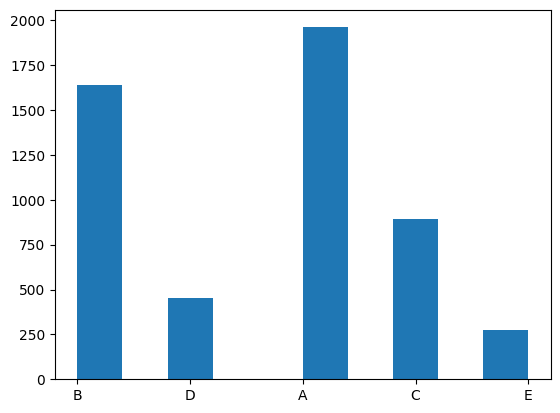

In [7]:
import matplotlib.pyplot as plt

print(csv['answer'].unique())

# remove A5III from answer
csv = csv[csv['answer'] != 'A5III']


plt.hist(csv['answer'].values);

In [8]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [9]:
# Sample DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'prompt': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'A': ['text1', 'text2', 'text3', 'text4', 'text5'],
    'B': ['text6', 'text7', 'text8', 'text9', 'text10'],
    'C': ['text11', 'text12', 'text13', 'text14', 'text15'],
    'D': ['text16', 'text17', 'text18', 'text19', 'text20'],
    'E': ['text21', 'text22', 'text23', 'text24', 'text25'],
    'answer': ['A', 'B', 'B', 'A', 'C'],
    'cluster number': [1, 2, 1, 3, 2],
    'round': [1, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text1,text6,text11,text16,text21,A,1,1
1,2,q2,text2,text7,text12,text17,text22,B,2,1
2,3,q3,text3,text8,text13,text18,text23,B,1,2
3,4,q4,text4,text9,text14,text19,text24,A,3,2
4,5,q5,text5,text10,text15,text20,text25,C,2,3


In [10]:

df = shuffle_answers(df)
df


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text21,text6,text11,text16,text1,E,1,1
1,2,q2,text7,text2,text12,text17,text22,A,2,1
2,3,q3,text8,text3,text13,text18,text23,A,1,2
3,4,q4,text14,text9,text4,text19,text24,C,3,2
4,5,q5,text5,text10,text25,text20,text15,E,2,3


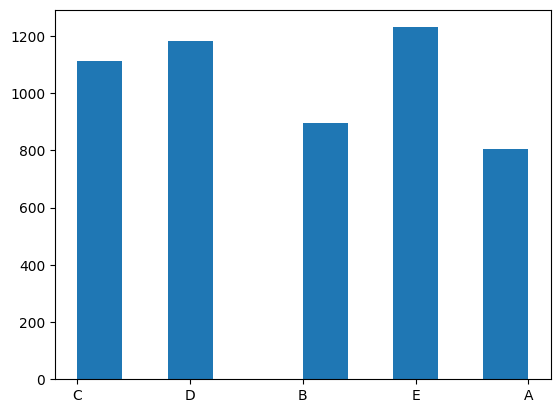

In [11]:
csv = shuffle_answers(csv)

plt.hist(csv['answer'].values);

In [12]:
csv

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0
1,2,What is the significance of HD 69830 b?,It is a gas giant exoplanet.,Models predict that tidal heating would produc...,It is 10 times more massive than Earth.,It takes 82/3 days to complete an orbit.,It orbits very close to its parent star.,D,0,1
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,It is a rocky planet.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,C,0,1
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating allows HD 69830 b to orbit very ...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating determines the rocky composition...,Tidal heating is responsible for the 10 times ...,Tidal heating causes the high heat flux at the...,E,0,1
...,...,...,...,...,...,...,...,...,...,...
5222,5223,What is the significance of BL Herculis variab...,They have a longer period compared to other Ty...,They have a bump on the ascending side of thei...,They are spectral class F at their brightest,They have the same luminosity as RR Lyrae vari...,They are population II stars found in the gala...,E,999,0
5223,5224,What is the significance of X Crucis?,X Crucis is a G-type supergiant.,X Crucis is a population I star.,X Crucis is a classical Cepheid variable.,X Crucis is a type of pulsating variable star.,X Crucis is a Durchmusterung object.,D,999,1
5224,5225,What is the visual magnitude range of RW Cephei?,8.6 to 10.7,6.0 to 7.3,6.0 to 8.6,7.3 to 10.7,10.7 to 12.0,B,999,2
5225,5226,What is a variable star?,A star whose brightness remains constant over ...,A star that only appears during certain seasons.,A star that emits different colors of light.,A star that exists in multiple places at once.,A star whose brightness fluctuates as seen fro...,E,999,3


# Add contex

In [13]:
from tqdm import tqdm

def generate_new_prompt(prompt, analyze_option, options):
    
    new_prompt = f'''You are a university professor, renowned as an expert in your field. Your teaching style is known for providing comprehensive and lengthy explanations, ensuring that your students grasp the depths of the topic at hand.
        
        Context: A student of yours approaches you after class, presenting a query that's been puzzling her. She's received varied opinions from her peers and is seeking clarity.
        
        Student's Question: {prompt}
        
        She think that the answer is: {analyze_option}.
        
        She's been told by her colleagues that potential answers could be:
        Option 1: {options[0]}.
        Option 2: {options[1]}.
        Option 3: {options[2]}.
        Option 4: {options[3]}.

        Kindly delve into the problem, elucidating the validity of her answer. Your aim is to tell her whether the answer is correct or wrong at the end. Critically examine each option, helping her discern how "wrong" or "right" her answer is. Provide a step-by-step analysis.
    '''
    return new_prompt

def add_context(df):
    
    new_df = df.copy()

    # append new_csv 4 times
    for i in range(4):
        new_df = pd.concat([new_df, df])
        
    print(f"New df length: {len(new_df)}")
    new_df['analyze_answer'] = ["A", "B", "C", "D", "E"] * (len(new_df) // 5)
    
    print(f"Adding context ... ")
    for i, row in tqdm(new_df.iterrows(), total=len(new_df)):
        possible_options = ["A", "B", "C", "D", "E"]
        
        # remove the correct answer from the possible options
        possible_options.remove(row['answer'])
        
        options = [row[option] for option in possible_options]
        
        analyze_option = row[row['answer']]
        
        new_df.at[i, 'new_prompt'] = generate_new_prompt(row['prompt'], analyze_option, options)    
        
    return new_df
    

In [14]:
new_csv = add_context(csv)

New df length: 26130
Adding context ... 


  0%|          | 0/26130 [00:00<?, ?it/s]

100%|██████████| 26130/26130 [00:01<00:00, 13088.97it/s]


In [15]:
new_csv.iloc[0]['prompt']

'What is the significance of HD 7924 b?'

In [16]:
new_csv.iloc[0]['new_prompt']


"You are a university professor, renowned as an expert in your field. Your teaching style is known for providing comprehensive and lengthy explanations, ensuring that your students grasp the depths of the topic at hand.\n        \n        Context: A student of yours approaches you after class, presenting a query that's been puzzling her. She's received varied opinions from her peers and is seeking clarity.\n        \n        Student's Question: What is the significance of HD 7924 b?\n        \n        She think that the answer is: It is a super-Earth exoplanet with a minimum mass 9.2 times that of Earth.\n        \n        She's been told by her colleagues that potential answers could be:\n        Option 1: It is the first planet discovered in the constellation Cassiopeia.\n        Option 2: It takes only about 129.5 hours to orbit the star.\n        Option 3: It is located approximately 55 light years away.\n        Option 4: It is a gaseous planet with unknown mass.\n\n        Kindly

In [17]:
csv = new_csv

# Train-test split

In [18]:
n = 200
train_csv = csv.head(-n).reset_index(drop=True)
test_csv = csv.tail(n).reset_index(drop=True)

In [19]:
train_csv.tail()

,id,prompt,A,B,C,D,E,answer,cluster number,round,analyze_answer,new_prompt
25925,5023,What is the purpose of a pneumatic trough?,To collect solids in a laboratory,To generate gas by displacing water,To measure the volume of liquids,To support gas bottles or bulbs,"To hold gases such as hydrogen, oxygen, and ni...",E,964,2,A,"You are a university professor, renowned as an..."
25926,5024,What is the purpose of pressure swing adsorpti...,To separate gas species from a mixture,To increase the pressure of a gas mixture,To decrease the pressure of a gas mixture,To generate nitrogen gas,To purify water,A,964,3,B,"You are a university professor, renowned as an..."
25927,5025,What is the significance of eccentric reducers...,To increase the flow rate of the fluid,To decrease the pressure of the fluid,To create a parallel edge between the two conn...,To ensure symmetrical flow conditions in the pipe,To prevent the accumulation of vapor in the pipe,E,964,4,C,"You are a university professor, renowned as an..."
25928,5026,What is the function of the vertex pipeline in...,To calculate the 2D data points in a scene,To program the vertex processing under the Dir...,To perform texturing and fragment shading,To eliminate unneeded data from going through ...,To create geometry data for display on a compu...,E,965,0,D,"You are a university professor, renowned as an..."
25929,5027,What is the purpose of view volume clipping an...,To calculate the 2D data points in a scene,To remove extraneous work and improve renderin...,To perform texturing and fragment shading,To eliminate unneeded data from going through ...,To create geometry data for display on a compu...,B,965,0,E,"You are a university professor, renowned as an..."


In [20]:
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round,analyze_answer,new_prompt
0,5028,What are some capabilities of the vertex proce...,Geometry blending,Displacement mapping,Higher-order primitives,Point sprites,Matrix stacks,B,965,0,A,"You are a university professor, renowned as an..."
1,5029,What is the significance of the Volari V5?,It was the first video card to use an AGP 8x i...,It was the first video card to support DirectX 9.,It introduced XGI Technology Inc as a new play...,It had a clock speed similar to the Radeon 960...,It provided superior performance compared to o...,D,965,1,B,"You are a university professor, renowned as an..."
2,5030,What is the purpose of the Radeon HD 8000 series?,To introduce AMD's shift from VLIW to RISC/SIM...,To improve the Graphics Core Next architecture,To accelerate video decoding and encoding,To support multi-monitor display,To provide support for OpenCL and Vulkan APIs,D,965,2,C,"You are a university professor, renowned as an..."
3,5031,What is the significance of the R200 GPU used ...,It introduced the first implementation of a ha...,It featured advanced memory bandwidth saving a...,"It included 2D GUI acceleration, video acceler...",It achieved higher performance and improved fe...,It improved the texture filtering capabilities...,D,965,3,D,"You are a university professor, renowned as an..."
4,5032,What is the significance of Mali-400 MP?,It is the first GPU to offer 2D and 3D acceler...,It is the first GPU to offer multi-core implem...,It is the most powerful GPU across multiple pl...,It is the first GPU to support OpenGL ES 2.0.,It is the first GPU to support resolutions up ...,B,965,4,E,"You are a university professor, renowned as an..."


In [21]:
test_csv.index = list(range(len(test_csv)))
test_csv.index.name = "id"
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round,analyze_answer,new_prompt
id,,,,,,,,,,,,
0,5028,What are some capabilities of the vertex proce...,Geometry blending,Displacement mapping,Higher-order primitives,Point sprites,Matrix stacks,B,965,0,A,"You are a university professor, renowned as an..."
1,5029,What is the significance of the Volari V5?,It was the first video card to use an AGP 8x i...,It was the first video card to support DirectX 9.,It introduced XGI Technology Inc as a new play...,It had a clock speed similar to the Radeon 960...,It provided superior performance compared to o...,D,965,1,B,"You are a university professor, renowned as an..."
2,5030,What is the purpose of the Radeon HD 8000 series?,To introduce AMD's shift from VLIW to RISC/SIM...,To improve the Graphics Core Next architecture,To accelerate video decoding and encoding,To support multi-monitor display,To provide support for OpenCL and Vulkan APIs,D,965,2,C,"You are a university professor, renowned as an..."
3,5031,What is the significance of the R200 GPU used ...,It introduced the first implementation of a ha...,It featured advanced memory bandwidth saving a...,"It included 2D GUI acceleration, video acceler...",It achieved higher performance and improved fe...,It improved the texture filtering capabilities...,D,965,3,D,"You are a university professor, renowned as an..."
4,5032,What is the significance of Mali-400 MP?,It is the first GPU to offer 2D and 3D acceler...,It is the first GPU to offer multi-core implem...,It is the most powerful GPU across multiple pl...,It is the first GPU to support OpenGL ES 2.0.,It is the first GPU to support resolutions up ...,B,965,4,E,"You are a university professor, renowned as an..."


In [22]:
out_dir = Path("../data/raw_questions_wiki_sci_1-splitted-w-context/")
out_dir.mkdir(exist_ok=True, parents=True)

train_csv.to_csv(out_dir / f"{file_name}_train.csv")
test_csv.to_csv(out_dir / f"{file_name}_test.csv")

In [24]:
out_dir

PosixPath('../data/raw_questions_wiki_sci_1-splitted-w-context')

In [23]:
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/raw_questions_wiki_sci_1-splitted-w-context/more_questions_raw_questions_wiki_sci_1_train.csv")
df

,Unnamed: 0,id,prompt,A,B,C,D,E,answer,cluster number,round,analyze_answer,new_prompt
0,0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It takes only about 129.5 hours to orbit the star,It is a super-Earth exoplanet with a minimum m...,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,C,0,0,A,"You are a university professor, renowned as an..."
1,1,2,What is the significance of HD 69830 b?,It is a gas giant exoplanet.,Models predict that tidal heating would produc...,It is 10 times more massive than Earth.,It takes 82/3 days to complete an orbit.,It orbits very close to its parent star.,D,0,1,B,"You are a university professor, renowned as an..."
2,2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b orbits very close to its parent sta...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b models predict that tidal heating w...,B,0,1,C,"You are a university professor, renowned as an..."
3,3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,It is a rocky planet.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,C,0,1,D,"You are a university professor, renowned as an..."
4,4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating allows HD 69830 b to orbit very ...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating determines the rocky composition...,Tidal heating is responsible for the 10 times ...,Tidal heating causes the high heat flux at the...,E,0,1,E,"You are a university professor, renowned as an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25925,25925,5023,What is the purpose of a pneumatic trough?,To collect solids in a laboratory,To generate gas by displacing water,To measure the volume of liquids,To support gas bottles or bulbs,"To hold gases such as hydrogen, oxygen, and ni...",E,964,2,A,"You are a university professor, renowned as an..."
25926,25926,5024,What is the purpose of pressure swing adsorpti...,To separate gas species from a mixture,To increase the pressure of a gas mixture,To decrease the pressure of a gas mixture,To generate nitrogen gas,To purify water,A,964,3,B,"You are a university professor, renowned as an..."
25927,25927,5025,What is the significance of eccentric reducers...,To increase the flow rate of the fluid,To decrease the pressure of the fluid,To create a parallel edge between the two conn...,To ensure symmetrical flow conditions in the pipe,To prevent the accumulation of vapor in the pipe,E,964,4,C,"You are a university professor, renowned as an..."
25928,25928,5026,What is the function of the vertex pipeline in...,To calculate the 2D data points in a scene,To program the vertex processing under the Dir...,To perform texturing and fragment shading,To eliminate unneeded data from going through ...,To create geometry data for display on a compu...,E,965,0,D,"You are a university professor, renowned as an..."
